# Chapter 1 - Introduction

## Intro 

In [54]:
%matplotlib inline

### NumPy

In [4]:
import numpy as np

x = np.array([[1, 2, 3], [4, 5,6]])
print("x:\n{}".format(x))

x:
[[1 2 3]
 [4 5 6]]


### SciPy

In [9]:
from scipy import sparse

eye = np.eye(4)
print("NumPy array:\n", eye)

NumPy array:
 [[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]


In [12]:
sparse_matrix = sparse.csr_matrix(eye)
print("\nSciPy sparse CSR matrix:\n", sparse_matrix)



SciPy sparse CSR matrix:
   (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


In [22]:
data = np.ones(4)
row_indices = np.arange(4)
col_indices = np.arange(4)
eye_coo = sparse.coo_matrix((data, (row_indices, col_indices)))
print("COO representation:\n", eye_coo)

COO representation:
   (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


### matplotlib

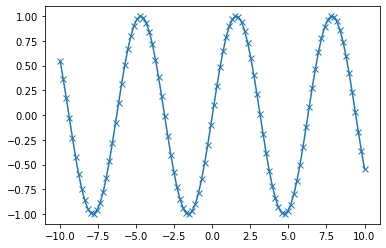

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 100)
y = np.sin(x)
plt.plot(x, y, marker="x")

### pandas 

In [50]:
import pandas as pd

data = {'Name': ["John", "Anna", "Peter", "Linda"],
       'Location': ["New York", "Paris", "Berlin", "London"],
       'Age': [24, 13, 53, 33]
       }

data_pandas = pd.DataFrame(data)
display(data_pandas)

,Name,Location,Age
0,John,New York,24
1,Anna,Paris,13
2,Peter,Berlin,53
3,Linda,London,33


In [51]:
data_pandas[data_pandas.Age>30]

,Name,Location,Age
2,Peter,Berlin,53
3,Linda,London,33


### verions


In [52]:

import sys
print("Python version:", sys.version)

import pandas as pd
print("pandas version:", pd.__version__)

import matplotlib
print("matplotlib version:", matplotlib.__version__)

import numpy as np
print("NumPy version:", np.__version__)

import scipy as sp
print("SciPy version:", sp.__version__)

import IPython
print("IPython version:", IPython.__version__)

import sklearn
print("scikit-learn version:", sklearn.__version__)

Python version: 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
pandas version: 1.1.3
matplotlib version: 3.3.2
NumPy version: 1.19.2
SciPy version: 1.5.2
IPython version: 7.19.0
scikit-learn version: 0.23.2


## First App: Classification Iris Species

### Meet the data 

In [56]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [57]:
print("Keys of iris dataset:\n", iris_dataset.keys())

Keys of iris dataset:
 dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])


In [63]:
print(iris_dataset['DESCR']+ "\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [64]:
print("Target names {}".format(iris_dataset['target_names']))

Target names ['setosa' 'versicolor' 'virginica']


In [65]:
print("Feature names:\n", iris_dataset['feature_names'])

Feature names:
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [70]:
print("Typeof data:", type(iris_dataset['data']))

Typeof data: <class 'numpy.ndarray'>


In [73]:
print("Shape of data: ", iris_dataset['data'].shape)

Shape of data:  (150, 4)


In [76]:
print("5 f r of data:\n " ,iris_dataset['data'][:5])

5 f r of data:
  [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [77]:
print("type of target: ", type(iris_dataset['target']))

type of target:  <class 'numpy.ndarray'>


In [79]:
print("type of target: ", iris_dataset['target'].shape)

type of target:  (150,)


In [80]:
print("Target: \n", iris_dataset['target'])

Target: 
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### Measuring success: Training and Testing Data

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state=0) 

In [85]:
print("X_train_shape: {}, y_train_shape: {}, X_test_shape: {}, y_test_shape: {}".format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X_train_shape: (112, 4), y_train_shape: (112,), X_test_shape: (38, 4), y_test_shape: (38,)


### First things first: look at your data


In [93]:
!pip install mglearn


array([[<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='sepal width (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='sepal width (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='sepal width (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal length (cm)', ylabel='petal length (cm)'>,
        <AxesSubplot:xlabel='petal width (cm)', ylabel='petal length (cm)'>],
       [<AxesSubplot:xlabel='sepal length (cm)', ylabel='petal width (c

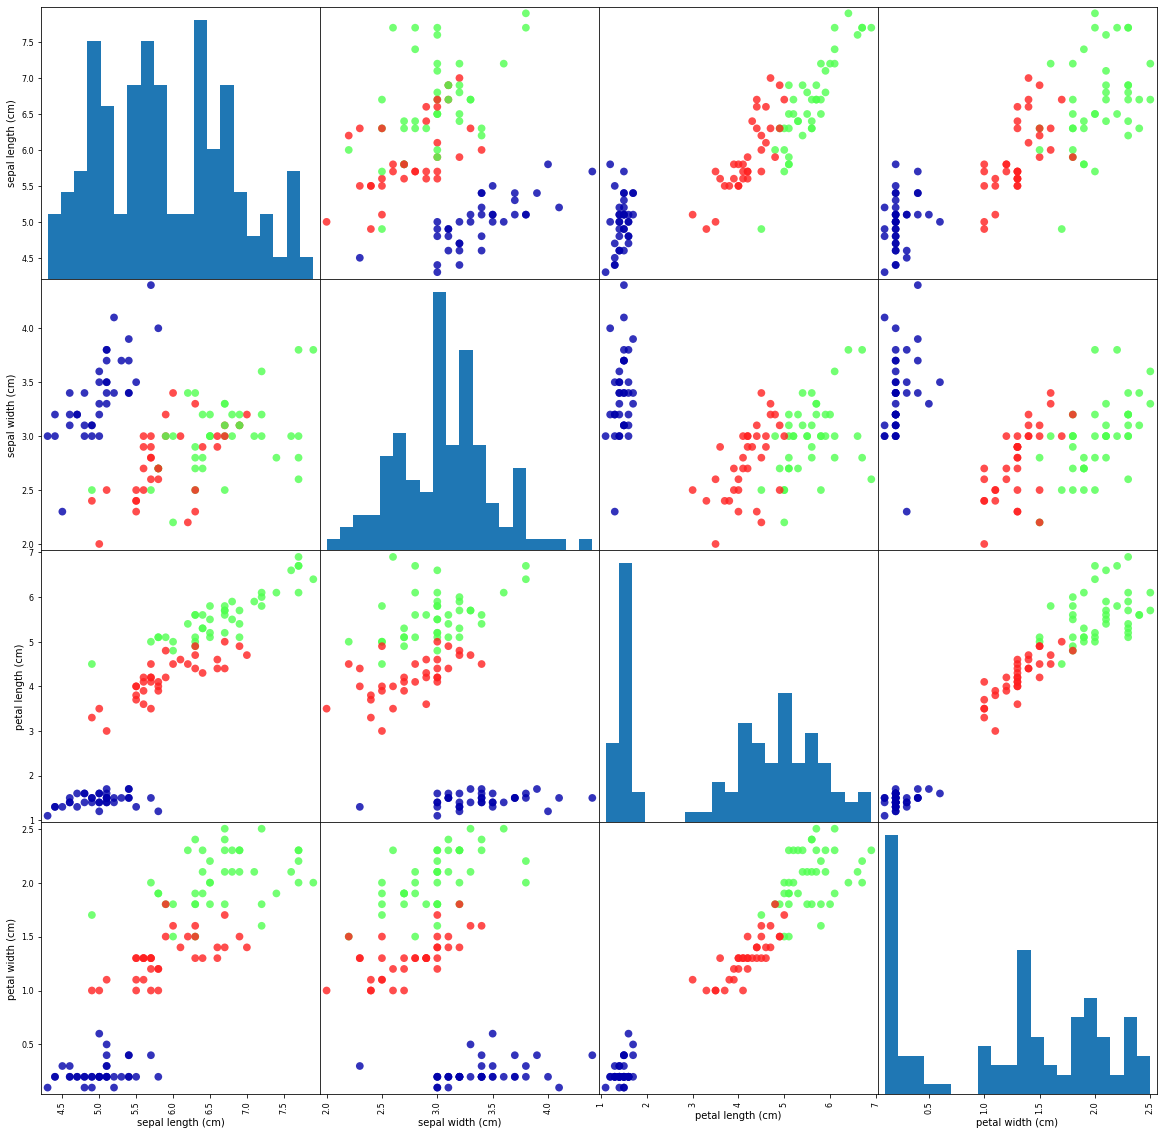

In [98]:
import mglearn
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)

pd.plotting.scatter_matrix(iris_dataframe, c=y_train, figsize=(20, 20),
                           marker='o', hist_kwds={'bins': 20}, s=60,
                           alpha=.8, cmap=mglearn.cm3)

### Building my first model: k-Nearest Neighbours

In [101]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=1)

In [102]:
# trining
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

### Making prediction


In [103]:
X_new = np.array([[5, 2.9, 1, 0.2]])

In [109]:
# prediction
prediction = knn.predict(X_new)

print("predicted class: ", iris_dataset['target_names'][prediction])

predicted class:  ['setosa']


### Evaluating the model

In [112]:
y_pred = knn.predict(X_test)
print("Test set predictions: ", y_pred)

Test set predictions:  [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0 2 1 0 2 2 1 0
 2]


In [114]:
print("Test set score {:.2f}".format(np.mean(y_test==y_pred)) )

Test set score 0.97


In [117]:
print("Test set score {:.2f}".format(knn.score(X_test, y_test)))

Test set score 0.97


### Summary 

In [122]:
# all things needed for k-nearest-neighbors

X_train, X_test, y_train, y_test = train_test_split(iris_dataset['data'], iris_dataset['target'], random_state = 0)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

test_set_score = knn.score(X_test, y_test)
print("Test set score: {:.2f}".format(test_set_score))

X_new = np.array([[5, 2.9, 1, 0.2]])
prediction = knn.predict(X_new)
print("Prediction fo new data is: ", iris_dataset['target_names'][prediction])


Test set score: 0.97
Prediction fo new data is:  ['setosa']
